In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
from rubin_scheduler.utils import healbin

In [17]:
d1 = np.load("baseline_v5.0.0_10yrs__trojan_5k_obs.npz")
#d1 = np.load("baseline_v4.3.1_10yrs__trojan_5k_obs.npz")
obs = d1["object_observations"].copy()
d1.close()

In [18]:
binned = healbin(obs["ra"], obs["dec"], obs["dec"]*0+1, 32, reduce_func=np.sum)

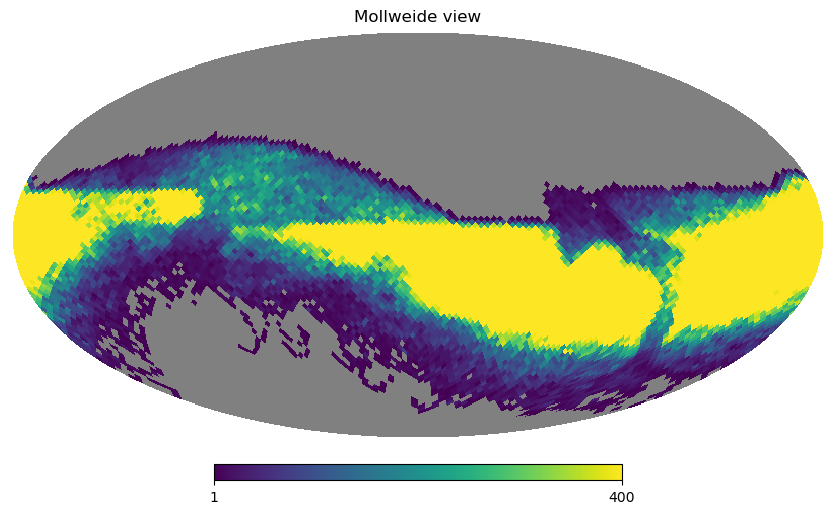

In [19]:
hp.mollview(binned, max=400)

In [20]:
obs.shape

(2553297,)

In [21]:
pre_com = np.load("/Users/yoachim/rubin_sim_data/orbits_precompute/trojan_5k.npz")

In [22]:
pre_com["positions"].shape, pre_com["mjds"].shape

((5000, 4383), (4383,))

In [23]:
ack = pre_com["positions"][:,0]

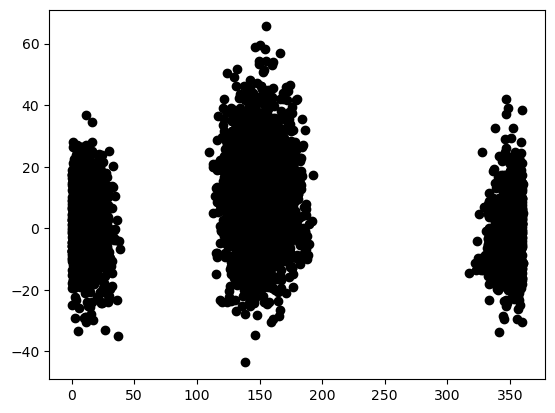

In [24]:
plt.plot(ack["ra"], ack["dec"], 'ko')

In [25]:
la = np.where( (ack["ra"] < 250) & (ack["ra"] > 100) )[0]
lb = np.where( (ack["ra"] > 250) | (ack["ra"] < 100) )[0]

In [26]:
la.shape

(2971,)

In [27]:
lb.shape

(2029,)

In [28]:
a_indx = np.isin(obs["obj_id"], la)
b_indx = np.isin(obs["obj_id"], lb)

In [29]:
print(obs["ra"][a_indx].size, obs["ra"][b_indx].size, obs["ra"][a_indx].size / obs["ra"][b_indx].size)

1499920 1053377 1.4239156541295281


In [16]:
print(obs["ra"][a_indx].size, obs["ra"][b_indx].size, obs["ra"][a_indx].size / obs["ra"][b_indx].size)

1522615 997251 1.5268122067563732
